# Importing the Libraries

In [1]:
## Pandas and Numpy

import pandas as pd
import numpy as np

## Plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

## Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

## Stats Libraries

from scipy.stats import chisquare

import statsmodels.api as sm
from statsmodels.formula.api import ols

## Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier ## XGBoost Classifier had to installed seperately

# Importing and Checking the Data

In [2]:
df = pd.read_excel('AttritionData.xlsx')

In [3]:
## Cheking the shape and size of each dataset:

print('Shape of dataset:', df.shape)

Shape of dataset: (1470, 35)


In [4]:
## Checking the column names and top 5 rows of each of the Datasets

df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


# Data Cleansing

In [5]:
## Checking for null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [6]:
## Checking for summary of the numeric variables

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [8]:
## Dropping redundant columns

df = df.drop(['DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','Over18','StandardHours'], axis = 1)

## Exploratory Analysis

### Age

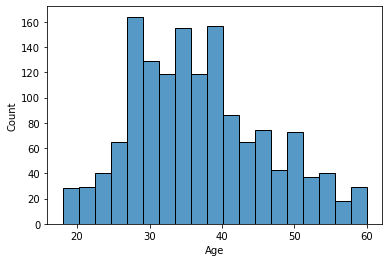

In [9]:
## Checking the distribution of age

sns.histplot(x = df.Age);

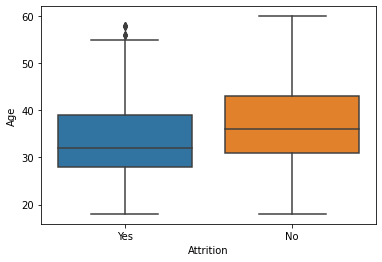

In [10]:
## Comparison of ages of people who quit

sns.boxplot(y = df.Age, x = df.Attrition);

In [11]:
## We see that people who churned have a lower average age. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average age for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('Age ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                  sum_sq      df          F        PR(>F)
Attrition    3107.333411     1.0  38.175887  8.356308e-10
Residual   119488.133255  1468.0        NaN           NaN


##### Since p value <0.05 we reject the null hypothesis. We see that people who have churned have lower Age on average.

### Business Travel

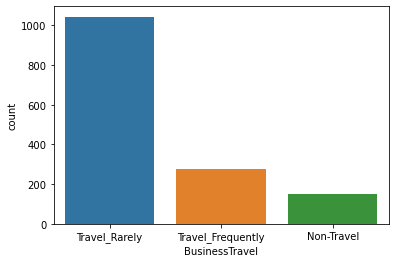

In [12]:
## Checking the distribution of business travel

sns.countplot(x = df.BusinessTravel);

In [13]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

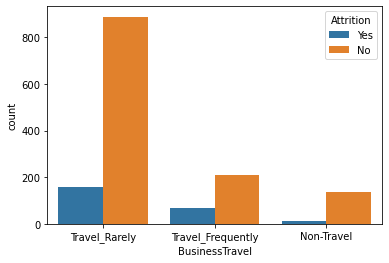

In [14]:
sns.countplot(x = df.BusinessTravel, hue = df.Attrition);

In [15]:
## Comparing Total Churn to Churn amongst different Categories of Business Travel

print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Travel Rarely group is',round(100* df[df.BusinessTravel =='Travel_Rarely'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Travel Frequently group is',round(100* df[df.BusinessTravel =='Travel_Frequently'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Non-Travel group is',round(100* df[df.BusinessTravel =='Non-Travel'].Attrition.value_counts(1)[1],2),'percent')

Percentage Churn in All Employees is 16.12 percent
Percentage Churn in Travel Rarely group is 14.96 percent
Percentage Churn in Travel Frequently group is 24.91 percent
Percentage Churn in Non-Travel group is 8.0 percent


In [16]:
## Testing the hypothesis that Churn is independent of amount of travel with chi-square test
## Null Hypothesis is that Churn is similar for all groups therefore Churn is independent of amount of travel

chisquare([14.96,24.91,8], f_exp = [16.12,16.12,16.12])

Power_divergenceResult(statistic=8.966755583126549, pvalue=0.011295195828747618)

##### Since p value <0.05 we reject the null hypothesis. We see that people who have churned travel more frequently

### Department

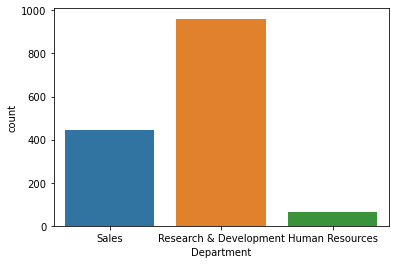

In [17]:
## Checking the distribution of Department

sns.countplot(x = df.Department);

In [18]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

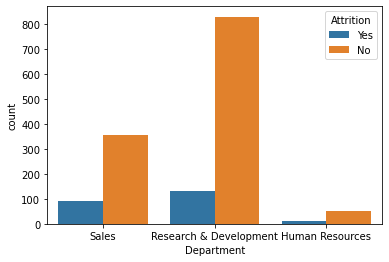

In [19]:
sns.countplot(x = df.Department, hue = df.Attrition);

In [20]:
## Comparing Total Churn to Churn amongst different Categories of Business Travel

print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Sales group is',round(100* df[df.Department =='Research & Development'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in R&D group is',round(100* df[df.Department =='Sales'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in HR group is',round(100* df[df.Department =='Human Resources'].Attrition.value_counts(1)[1],2),'percent')

Percentage Churn in All Employees is 16.12 percent
Percentage Churn in Sales group is 13.84 percent
Percentage Churn in R&D group is 20.63 percent
Percentage Churn in HR group is 19.05 percent


In [21]:
## Testing the hypothesis that Churn is independent of Department with chi-square test
## Null Hypothesis is that Churn is similar for all groups therefore Churn is independent of Department

chisquare([13.84,20.63,19.05], f_exp = [16.12,16.12,16.12])

Power_divergenceResult(statistic=2.1168362282878403, pvalue=0.3470042975839136)

##### Since p value >0.05 we fail to reject the null hypothesis. We see that churn is independent of Department

### Distance From Home

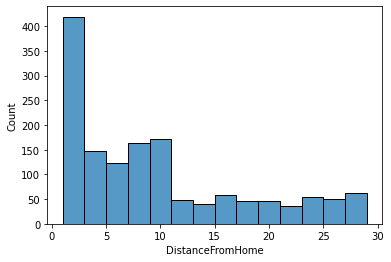

In [22]:
## Checking the distribution of Distance From Home

sns.histplot(x = df.DistanceFromHome);

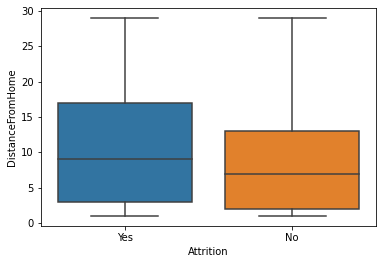

In [23]:
## Comparison of Distance of home of people who quit and those who stayed

sns.boxplot(y = df.DistanceFromHome, x = df.Attrition);

In [24]:
## We see that people who churned have a higher average distance from home. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average distance from home for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('DistanceFromHome ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                 sum_sq      df         F    PR(>F)
Attrition    586.226497     1.0  8.968277  0.002793
Residual   95958.291191  1468.0       NaN       NaN


##### Since p value <0.05 we reject the null hypothesis. We see that people who have churned have higher distance from home on average.

### Education

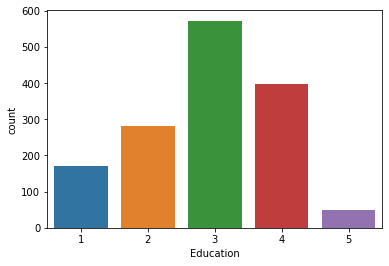

In [25]:
## distribution of education

sns.countplot(df.Education);

In [26]:
df.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

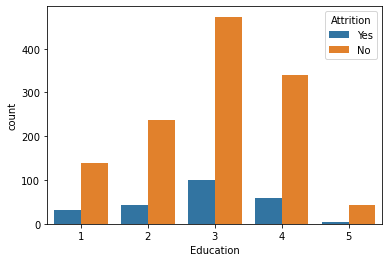

In [27]:
sns.countplot(df.Education, hue = df.Attrition);

In [28]:
## Comparing Total Churn to Churn amongst different Categories of Business Travel

print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Education Level 1 is',round(100* df[df.Education ==1].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Education Level 2 is',round(100* df[df.Education ==2].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Education Level 3 is',round(100* df[df.Education ==3].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Education Level 4 is',round(100* df[df.Education ==4].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Education Level 5 is',round(100* df[df.Education ==5].Attrition.value_counts(1)[1],2),'percent')

Percentage Churn in All Employees is 16.12 percent
Percentage Churn in Education Level 1 is 18.24 percent
Percentage Churn in Education Level 2 is 15.6 percent
Percentage Churn in Education Level 3 is 17.31 percent
Percentage Churn in Education Level 4 is 14.57 percent
Percentage Churn in Education Level 5 is 10.42 percent


In [29]:
## Testing the hypothesis that Churn is independent of Education Level with chi-square test
## Null Hypothesis is that Churn is similar for all levels of education therefore Churn is independent of Education level

chisquare([18.24,15.60,17.31,14.57,10.42], f_exp = [16.12,16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=2.547977667493796, pvalue=0.6360657446889251)

##### Since p value > 0.05 therefore we fail to reject the Null Hypothesis
##### Therefore we conclude on the basis of the plots, percentage of Churn for each Education Level and Chi-Square Test that Churn is independent of Education Level

### Education Field

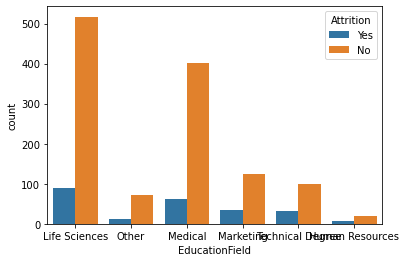

In [30]:
## Distribution of Education Field

sns.countplot(df.EducationField, hue = df.Attrition);

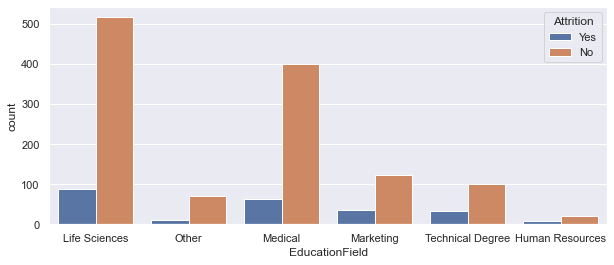

In [31]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(df.EducationField, hue = df.Attrition);

In [32]:
sns.reset_orig()

In [33]:
##import matplotlib
##matplotlib.rc_file_defaults()

In [34]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [35]:
## Comparing Total Churn to Churn amongst different Categories of Business Travel

print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Life Sciences is',round(100* df[df.EducationField =='Life Sciences'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Medical is',round(100* df[df.EducationField =='Medical'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Marketing is',round(100* df[df.EducationField =='Marketing'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Technical Degree is',round(100* df[df.EducationField =='Technical Degree'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Human Resources is',round(100* df[df.EducationField =='Human Resources'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Other is',round(100* df[df.EducationField =='Other'].Attrition.value_counts(1)[1],2),'percent')

Percentage Churn in All Employees is 16.12 percent
Percentage Churn in Life Sciences is 14.69 percent
Percentage Churn in Medical is 13.58 percent
Percentage Churn in Marketing is 22.01 percent
Percentage Churn in Technical Degree is 24.24 percent
Percentage Churn in Human Resources is 25.93 percent
Percentage Churn in Other is 13.41 percent


In [36]:
## Testing the hypothesis that Churn is independent of Education Field with chi-square test
## Null Hypothesis is that Churn is similar for all education fields therefore Churn is independent of Education Field

chisquare([14.69,13.58,22.01,24.24,25.93,13.41], f_exp = [16.12,16.12,16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=13.194987593052105, pvalue=0.021618456071202545)

##### Since p value < 0.05 therefore we reject the Null Hypothesis
##### Therefore we conclude on the basis of the plots, percentage of Churn for each Education Field and Chi-Square Test that Churn is dependent on Education Field

### Environment Satisfaction

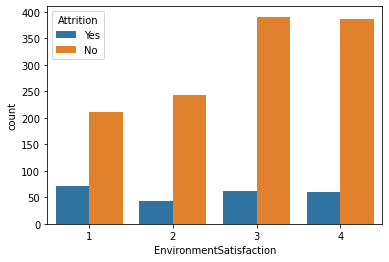

In [37]:
sns.countplot(df.EnvironmentSatisfaction, hue = df.Attrition);

In [38]:
df.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [39]:
## Comparing Total Churn to Churn amongst different Categories of Business Travel

print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Environment Satisfaction Level 1 is',round(100* df[df.EnvironmentSatisfaction ==1].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Environment Satisfaction Level 2 is',round(100* df[df.EnvironmentSatisfaction ==2].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Environment Satisfaction Level 3 is',round(100* df[df.EnvironmentSatisfaction ==3].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Environment Satisfaction Level 4 is',round(100* df[df.EnvironmentSatisfaction ==4].Attrition.value_counts(1)[1],2),'percent')


Percentage Churn in All Employees is 16.12 percent
Percentage Churn in Environment Satisfaction Level 1 is 25.35 percent
Percentage Churn in Environment Satisfaction Level 2 is 14.98 percent
Percentage Churn in Environment Satisfaction Level 3 is 13.69 percent
Percentage Churn in Environment Satisfaction Level 4 is 13.45 percent


In [40]:
## Testing the hypothesis that Churn is independent of Environment Satisfaction with chi-square test
## Null Hypothesis is that Churn is similar for all Enviroment Satisfaction Levels therefore Churn is independent of Environment Satisfaction

chisquare([25.35,14.98,13.69,13.45], f_exp = [16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=6.174088089330026, pvalue=0.10344090570793818)

##### Since p value > 0.05 therefore we fail to reject the Null Hypothesis
##### However, we should not completely discard this variable as p value was quite close to 0.05

### Gender

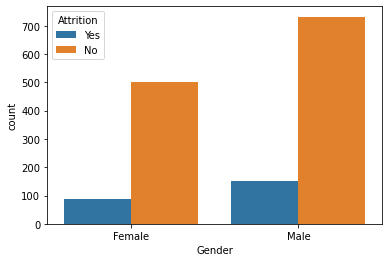

In [41]:
sns.countplot(df.Gender, hue = df.Attrition );

In [42]:
## Comparing Total Churn to Churn amongst Males and Females

print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Females is',round(100* df[df.Gender =='Female'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Males is',round(100* df[df.Gender =='Male'].Attrition.value_counts(1)[1],2),'percent')


Percentage Churn in All Employees is 16.12 percent
Percentage Churn in Females is 14.8 percent
Percentage Churn in Males is 17.01 percent


In [43]:
## Testing the hypothesis that Churn is independent of Environment Satisfaction with chi-square test
## Null Hypothesis is that Churn is similar for all Enviroment Satisfaction Levels therefore Churn is independent of Environment Satisfaction

chisquare([14.8,17.01], f_exp = [16.12,16.12])

Power_divergenceResult(statistic=0.1572270471464021, pvalue=0.6917224454386737)

##### Since p value > 0.05 therefore we fail to reject the Null Hypothesis
##### Attrition is independent of Gender

### Job Involvement

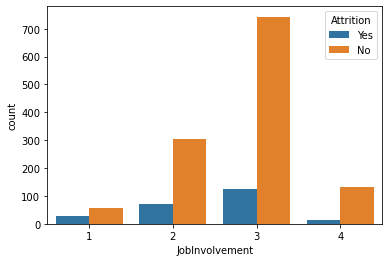

In [44]:
sns.countplot(df.JobInvolvement, hue = df.Attrition);

In [45]:
## Comparing Total Churn to Churn amongst different levels of Job Involvement

print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Involvement Level 1 is',round(100* df[df.JobInvolvement ==1].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Involvement Level 2 is',round(100* df[df.JobInvolvement ==2].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Involvement Level 3 is',round(100* df[df.JobInvolvement ==3].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Involvement Level 4 is',round(100* df[df.JobInvolvement ==4].Attrition.value_counts(1)[1],2),'percent')


Percentage Churn in All Employees is 16.12 percent
Percentage Churn in Job Involvement Level 1 is 33.73 percent
Percentage Churn in Job Involvement Level 2 is 18.93 percent
Percentage Churn in Job Involvement Level 3 is 14.4 percent
Percentage Churn in Job Involvement Level 4 is 9.03 percent


In [46]:
## Testing the hypothesis that Churn is independent of Job Involvement with chi-square test
## Null Hypothesis is that Churn is similar for all Job Involvement Levels therefore Churn is independent of Environment Satisfaction

chisquare([33.73,18.93,14.4,9.03], f_exp = [16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=23.02944789081885, pvalue=3.9816275039371276e-05)

##### p-value <0.05. Therefore we reject the Null Hypothesis. Churn is dependent on Job Involvement

### Job Level

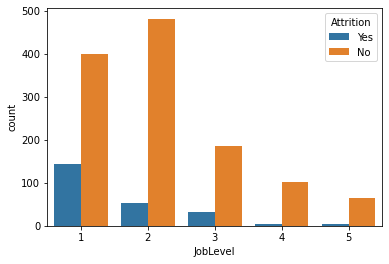

In [47]:
sns.countplot(df.JobLevel, hue = df.Attrition);

In [48]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Level 1 is',round(100* df[df.JobLevel ==1].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Level 2 is',round(100* df[df.JobLevel ==2].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Level 3 is',round(100* df[df.JobLevel ==3].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Level 4 is',round(100* df[df.JobLevel ==4].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn in Job Level 5 is',round(100* df[df.JobLevel ==5].Attrition.value_counts(1)[1],2),'percent')

Percentage Churn in All Employees is 16.12 percent
Percentage Churn in Job Level 1 is 26.34 percent
Percentage Churn in Job Level 2 is 9.74 percent
Percentage Churn in Job Level 3 is 14.68 percent
Percentage Churn in Job Level 4 is 4.72 percent
Percentage Churn in Job Level 5 is 7.25 percent


In [49]:
## Testing the hypothesis that Churn is independent of Job Level with chi-square test
## Null Hypothesis is that Churn is similar for all Job  Levels therefore Churn is independent of Job Levels

chisquare([26.34,9.74,14.68,4.72,7.25], f_exp = [16.12,16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=22.075887096774196, pvalue=0.00019356834093473685)

##### p-value <0.05. Therefore we reject the Null Hypothesis. Churn is dependent on Job Level

### Job Role

In [50]:
sns.set(rc={'figure.figsize':(20,4)})

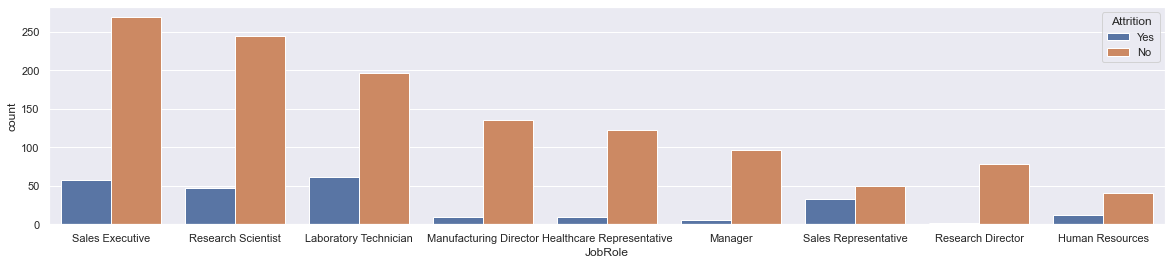

In [51]:
sns.countplot(df.JobRole, hue = df.Attrition);

In [52]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [53]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Sales Executive is',round(100* df[df.JobRole =='Sales Executive'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Research Scientist is',round(100* df[df.JobRole =='Research Scientist'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Laboratory Technician is',round(100* df[df.JobRole =='Laboratory Technician'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Manufacturing Director is',round(100* df[df.JobRole =='Manufacturing Director'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Healthcare Representative is',round(100* df[df.JobRole =='Healthcare Representative'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Manager is',round(100* df[df.JobRole =='Manager'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Sales Representative is',round(100* df[df.JobRole =='Sales Representative'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Research Director is',round(100* df[df.JobRole =='Research Director'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Human Resources is',round(100* df[df.JobRole =='Human Resources'].Attrition.value_counts(1)[1],2),'percent')

Percentage Churn in All Employees is 16.12 percent
Percentage Churn amongst Sales Executive is 17.48 percent
Percentage Churn amongst Research Scientist is 16.1 percent
Percentage Churn amongst Laboratory Technician is 23.94 percent
Percentage Churn amongst Manufacturing Director is 6.9 percent
Percentage Churn amongst Healthcare Representative is 6.87 percent
Percentage Churn amongst Manager is 4.9 percent
Percentage Churn amongst Sales Representative is 39.76 percent
Percentage Churn amongst Research Director is 2.5 percent
Percentage Churn amongst Human Resources is 23.08 percent


In [54]:
## Testing the hypothesis that Churn is independent of Job Level with chi-square test
## Null Hypothesis is that Churn is similar for all Job  Levels therefore Churn is independent of Job Levels

chisquare([17.48,16.1,23.94,6.9,6.87,4.9,39.76,2.5,23.08], f_exp = [16.12,16.12,16.12,16.12,16.12,16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=71.47998138957816, pvalue=2.4921074322332365e-12)

##### p-value <0.05. Therefore we reject the Null Hypothesis. Churn is dependent on JobRole

### Job Satisfaction

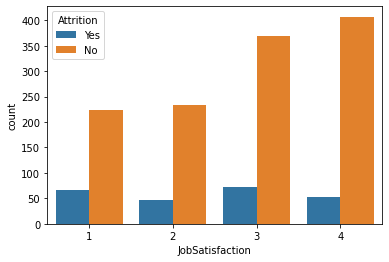

In [55]:
sns.reset_orig()

sns.countplot(df.JobSatisfaction, hue = df.Attrition);

In [56]:
df.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [57]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Job Satsifaction Level 1 is',round(100* df[df.JobSatisfaction ==1].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Job Satsifaction Level 2 is',round(100* df[df.JobSatisfaction ==2].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Job Satsifaction Level 3 is',round(100* df[df.JobSatisfaction ==3].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Job Satsifaction Level 4 is',round(100* df[df.JobSatisfaction ==4].Attrition.value_counts(1)[1],2),'percent')

Percentage Churn in All Employees is 16.12 percent
Percentage Churn amongst Job Satsifaction Level 1 is 22.84 percent
Percentage Churn amongst Job Satsifaction Level 2 is 16.43 percent
Percentage Churn amongst Job Satsifaction Level 3 is 16.52 percent
Percentage Churn amongst Job Satsifaction Level 4 is 11.33 percent


In [58]:
## Testing the hypothesis that Churn is independent of Job Satisfaction Level with chi-square test
## Null Hypothesis is that Churn is similar for all Job Satisfaction Levels therefore Churn is independent of Job Levels

chisquare([22.84,16.43,16.52,11.33], f_exp = [16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=4.240607940446649, pvalue=0.23662757733224515)

##### p value >0.05 therefore we fail to reject the NULL hypothesis therefore Churn is independent of Job Satisfaction

### Marital Status

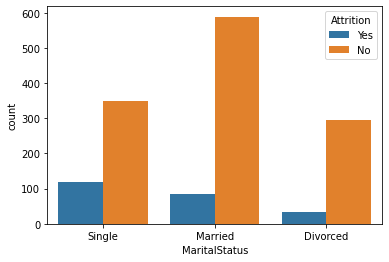

In [59]:
sns.countplot(df.MaritalStatus, hue = df.Attrition);

In [60]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Single employees is',round(100* df[df.MaritalStatus =='Single'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Married employees is',round(100* df[df.MaritalStatus =='Married'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst Divorced employees is',round(100* df[df.MaritalStatus =='Divorced'].Attrition.value_counts(1)[1],2),'percent')



Percentage Churn in All Employees is 16.12 percent
Percentage Churn amongst Single employees is 25.53 percent
Percentage Churn amongst Married employees is 12.48 percent
Percentage Churn amongst Divorced employees is 10.09 percent


In [61]:
## Testing the hypothesis that Churn is independent of Marital Status with chi-square test
## Null Hypothesis is that Churn is similar for all Marital Status 

chisquare([25.53,12.48,10.09], f_exp = [16.12,16.12,16.12])

Power_divergenceResult(statistic=8.570632754342434, pvalue=0.013769264551139495)

##### p value <0.05 therefore we reject the NULL hypothesis therefore Churn is dependent on Marital Status. However, this may also be due to age

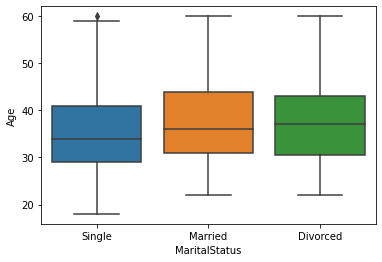

In [62]:
sns.boxplot(x = df.MaritalStatus, y = df.Age);

### Monthly Income

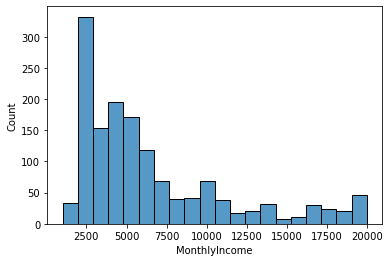

In [63]:
sns.histplot(df.MonthlyIncome);

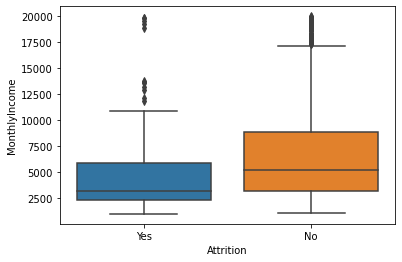

In [64]:
sns.boxplot(y = df.MonthlyIncome, x = df.Attrition);

In [65]:
## We see that people who churned have a lower Monthly Income. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average monthly income for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('MonthlyIncome ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
Attrition  8.318699e+08     1.0  38.488819  7.147364e-10
Residual   3.172831e+10  1468.0        NaN           NaN


##### p-value <0.05 therefore we reject the null hypothesis. Attrition is impacted by monthly income

### Number of Companies Worked

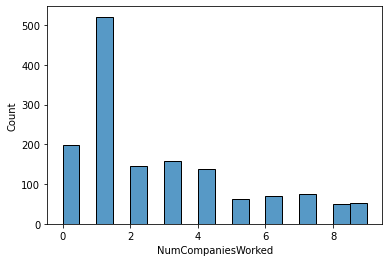

In [66]:
sns.histplot(df.NumCompaniesWorked);

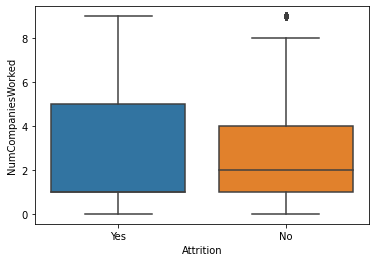

In [67]:
sns.boxplot(y = df.NumCompaniesWorked, x = df.Attrition);

In [68]:
## We see that people who churned have worked for higher number of companies. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average number of companies for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('NumCompaniesWorked ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                sum_sq      df         F    PR(>F)
Attrition    17.340567     1.0  2.782287  0.095525
Residual   9149.291406  1468.0       NaN       NaN


##### p value >0.05 therefore we fail to reject the NULL hypothesis. churn is independent of number of companies

### OverTime

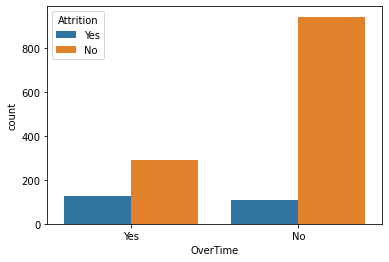

In [69]:
sns.countplot(df.OverTime, hue = df.Attrition);

##### We can clearly see that people who do overtime have high attrition

In [70]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees who did overtime is',round(100* df[df.OverTime =='Yes'].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees who didnt do overtime is',round(100* df[df.OverTime =='No'].Attrition.value_counts(1)[1],2),'percent')


Percentage Churn in All Employees is 16.12 percent
Percentage Churn amongst employees who did overtime is 30.53 percent
Percentage Churn amongst employees who didnt do overtime is 10.44 percent


In [71]:
## Testing the hypothesis that Churn is independent of Overtime with chi-square test
## Null Hypothesis is that Churn is similar for people who did overtime and people who did not 

chisquare([30.53,10.44], f_exp = [16.12,16.12])

Power_divergenceResult(statistic=14.882785359801488, pvalue=0.00011440222824082013)

### PercentSalaryHike

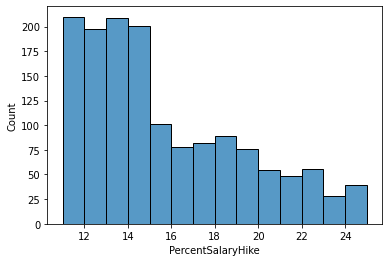

In [72]:
sns.histplot(df.PercentSalaryHike);

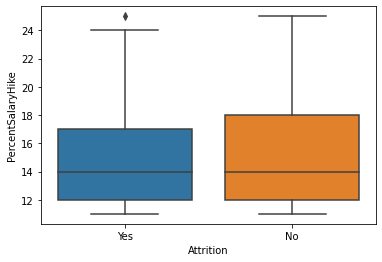

In [73]:
sns.boxplot(y = df.PercentSalaryHike, x = df.Attrition);

In [74]:
## We see that people who churned have similar percentage hike to people who didnt. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average percentage hike for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('PercentSalaryHike ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                 sum_sq      df         F    PR(>F)
Attrition      3.574647     1.0  0.266728  0.605613
Residual   19673.892020  1468.0       NaN       NaN


##### P value >0.05 therefore we fail to reject the NULL hypothesis. Attrition is independent of salary hikes

### PerformanceRating

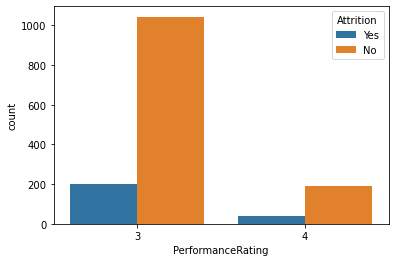

In [75]:
sns.countplot(df.PerformanceRating, hue = df.Attrition);

In [76]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees performance rating 3',round(100* df[df.PerformanceRating ==3].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees performance rating 4',round(100* df[df.PerformanceRating ==4].Attrition.value_counts(1)[1],2),'percent')

Percentage Churn in All Employees is 16.12 percent
Percentage Churn amongst employees performance rating 3 16.08 percent
Percentage Churn amongst employees performance rating 4 16.37 percent


##### Even without the chi-square test we can say that attrition is not impacted by performance rating

### RelationshipSatisfaction

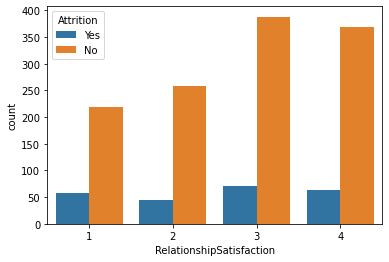

In [77]:
sns.countplot(df.RelationshipSatisfaction, hue = df.Attrition);

In [78]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with RelationshipSatisfaction = 1 is',round(100* df[df.RelationshipSatisfaction ==1].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with RelationshipSatisfaction = 2 is',round(100* df[df.RelationshipSatisfaction ==2].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with RelationshipSatisfaction = 3 is',round(100* df[df.RelationshipSatisfaction ==3].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with RelationshipSatisfaction = 4 is',round(100* df[df.RelationshipSatisfaction ==4].Attrition.value_counts(1)[1],2),'percent')


Percentage Churn in All Employees is 16.12 percent
Percentage Churn amongst employees with RelationshipSatisfaction = 1 is 20.65 percent
Percentage Churn amongst employees with RelationshipSatisfaction = 2 is 14.85 percent
Percentage Churn amongst employees with RelationshipSatisfaction = 3 is 15.47 percent
Percentage Churn amongst employees with RelationshipSatisfaction = 4 is 14.81 percent


In [79]:
## Testing the hypothesis that Churn is independent of RelationshipSatisfaction with chi-square test
## Null Hypothesis is that Churn is similar for all RelationshipSatisfaction 

chisquare([20.65,14.85,15.47,14.81], f_exp = [16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=1.5057320099255571, pvalue=0.6809480187341754)

##### p value >0.05 therefore we fail to reject the NULL hypothesis. attriton is independent of Relationship Satisfaction variable

### StockOptionLevel

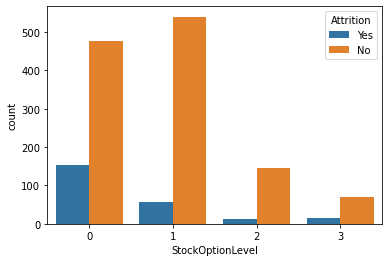

In [80]:
sns.countplot(df.StockOptionLevel, hue = df.Attrition);

In [81]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with StockOptionLevel = 0 is',round(100* df[df.StockOptionLevel ==0].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with StockOptionLevel = 1 is',round(100* df[df.StockOptionLevel ==1].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with StockOptionLevel = 2 is',round(100* df[df.StockOptionLevel ==2].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with StockOptionLevel = 3 is',round(100* df[df.StockOptionLevel ==3].Attrition.value_counts(1)[1],2),'percent')


Percentage Churn in All Employees is 16.12 percent
Percentage Churn amongst employees with StockOptionLevel = 0 is 24.41 percent
Percentage Churn amongst employees with StockOptionLevel = 1 is 9.4 percent
Percentage Churn amongst employees with StockOptionLevel = 2 is 7.59 percent
Percentage Churn amongst employees with StockOptionLevel = 3 is 17.65 percent


In [82]:
## Testing the hypothesis that Churn is independent of StockOptionLevel with chi-square test
## Null Hypothesis is that Churn is similar for all StockOptionLevels 

chisquare([24.41,9.4,7.59,17.65], f_exp = [16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=11.723591811414392, pvalue=0.00839256398469596)

##### P value <0.05 therefore we reject the NULL hypothesis. StockOptionLevels 1 and 2 seem to arrest attrition ---------> this is to be used as nominal variable not ordinal

### TotalWorkingYears

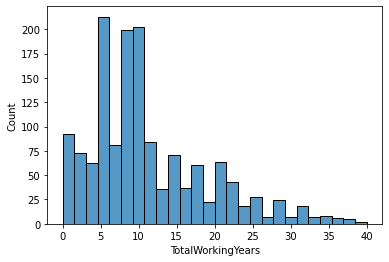

In [83]:
sns.histplot(df.TotalWorkingYears);

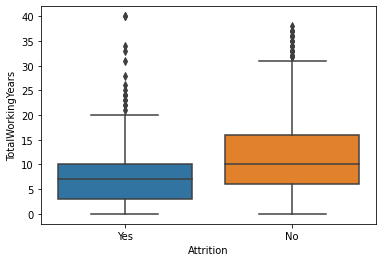

In [84]:
sns.boxplot(y = df.TotalWorkingYears, x = df.Attrition);

In [85]:
## We see that people who churned have lower TotalWorkingYears to people who didnt. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average Total Working Years for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('TotalWorkingYears ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
Attrition   2602.445676     1.0  44.252491  4.061878e-11
Residual   86331.642079  1468.0        NaN           NaN


##### P value <0.05 therefore we reject the NULL hypothesis have lower total working years. But this may also be related to age.

### TrainingTimesLastYear

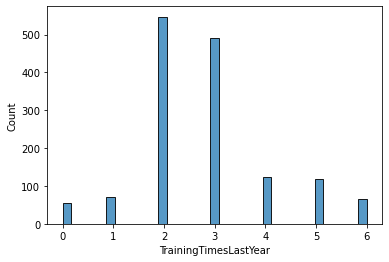

In [86]:
sns.histplot(df.TrainingTimesLastYear);

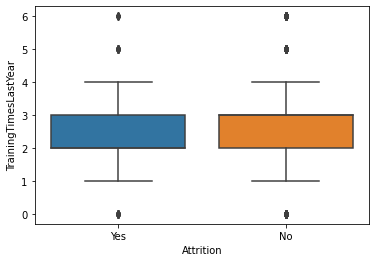

In [87]:
sns.boxplot(y = df.TrainingTimesLastYear, x = df.Attrition);

##### We see that Training last year has almost no effect on attrition

### WorkLifeBalance

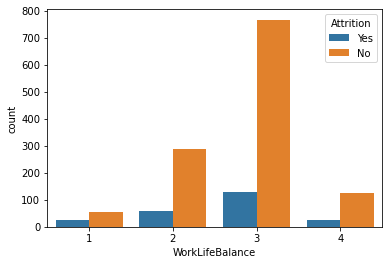

In [88]:
sns.countplot(df.WorkLifeBalance, hue = df.Attrition);

In [89]:
print('Percentage Churn in All Employees is',round(100*df.Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with WorkLifeBalance = 1 is',round(100* df[df.WorkLifeBalance ==1].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with WorkLifeBalance = 2 is',round(100* df[df.WorkLifeBalance ==2].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with WorkLifeBalance = 3 is',round(100* df[df.WorkLifeBalance ==3].Attrition.value_counts(1)[1],2),'percent')
print('Percentage Churn amongst employees with WorkLifeBalance = 4 is',round(100* df[df.WorkLifeBalance ==4].Attrition.value_counts(1)[1],2),'percent')


Percentage Churn in All Employees is 16.12 percent
Percentage Churn amongst employees with WorkLifeBalance = 1 is 31.25 percent
Percentage Churn amongst employees with WorkLifeBalance = 2 is 16.86 percent
Percentage Churn amongst employees with WorkLifeBalance = 3 is 14.22 percent
Percentage Churn amongst employees with WorkLifeBalance = 4 is 17.65 percent


In [90]:
## Testing the hypothesis that Churn is independent of WorkLifeBalance with chi-square test
## Null Hypothesis is that Churn is similar for all StockOptionLevels 

chisquare([31.25,16.86,14.22,17.65], f_exp = [16.12,16.12,16.12,16.12])

Power_divergenceResult(statistic=14.603933002481387, pvalue=0.0021883917888304515)

##### P value <0.05 therefore we reject the NULL Hypothesis. We see that WorkLife Balance has an impact on Attrition

### YearsAtCompany

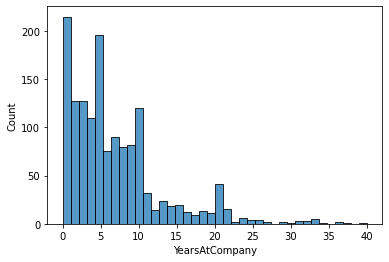

In [91]:
sns.histplot(df.YearsAtCompany);

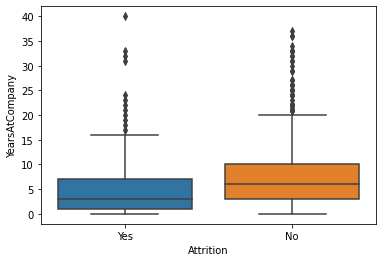

In [92]:
sns.boxplot(y = df.YearsAtCompany, x = df.Attrition);

In [93]:
## We see that people who churned have lower Years at Company compared to people who didnt. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average Total Working Years for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('YearsAtCompany ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
Attrition    995.860381     1.0  27.001624  2.318872e-07
Residual   54142.041660  1468.0        NaN           NaN


##### p value < 0.05, therefore we reject the null Hypothesis. We see people with lower years at company tend to attrite

### YearsInCurrentRole

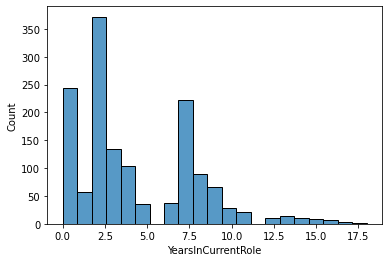

In [94]:
sns.histplot(df.YearsInCurrentRole);

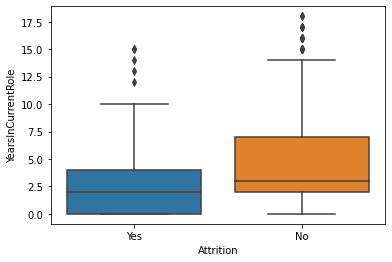

In [95]:
sns.boxplot(y = df.YearsInCurrentRole, x = df.Attrition);

In [96]:
## We see that people who churned have lower Years in current role compared to people who didnt. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average Total years in company for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('YearsInCurrentRole ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
Attrition    497.032639     1.0  38.838303  6.003186e-10
Residual   18786.709538  1468.0        NaN           NaN


##### p value < 0.05, therefore we reject the null Hypothesis. We see people with lower years in current role tend to attrite

### YearsSinceLastPromotion

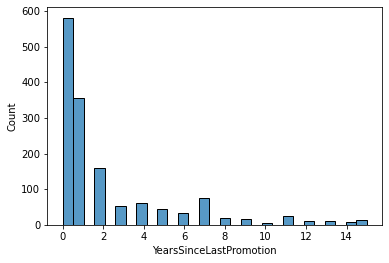

In [97]:
sns.histplot(df.YearsSinceLastPromotion);

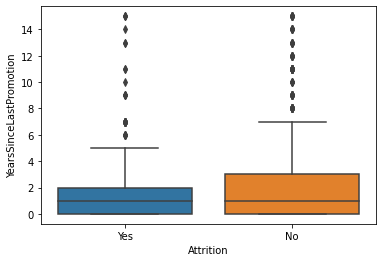

In [98]:
sns.boxplot(y = df.YearsSinceLastPromotion, x = df.Attrition);

In [99]:
## We see that people who churned have same Yearssincelast promotion as those who didnt churn. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average tenure for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('YearsSinceLastPromotion ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)


                 sum_sq      df         F   PR(>F)
Attrition     16.630709     1.0  1.602218  0.20579
Residual   15237.548883  1468.0       NaN      NaN


##### Since p value > 0.05 we fail to reject the null hypothesis. We see that people who have churned have similar years since last promotion to those who didn't

### Years With Current Manager

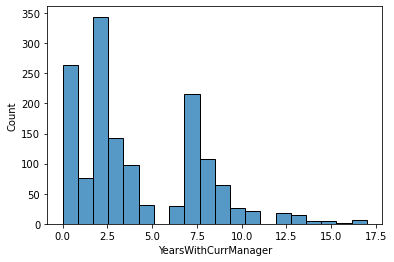

In [100]:
sns.histplot(df.YearsWithCurrManager);

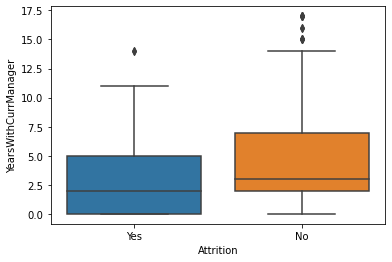

In [101]:
sns.boxplot(y = df.YearsWithCurrManager, x = df.Attrition);

In [102]:
## We see that people who churned have lower years with current manager as compared to those who didnt churn. We can confirm this with an ANOVA test
## NULL Hypothesis is that the average tenure for people who churn and those----
## ----who do not is the same (difference is not statistically significant)

mod = ols('YearsWithCurrManager ~ Attrition', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)


                 sum_sq      df          F        PR(>F)
Attrition    456.313039     1.0  36.712311  1.736987e-09
Residual   18246.400567  1468.0        NaN           NaN


##### p value < 0.05, therefore we reject the null Hypothesis. We see people with lower years with current manager tend to attrite

## Keeping on the important Variables

In [103]:
newdf = df[['Age','BusinessTravel','DistanceFromHome','EducationField','JobInvolvement','JobLevel', 'JobRole','MonthlyIncome',
           'OverTime','StockOptionLevel','TotalWorkingYears','WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition']]

In [104]:
newdf.head()

,Age,BusinessTravel,DistanceFromHome,EducationField,JobInvolvement,JobLevel,JobRole,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1,Life Sciences,3,2,Sales Executive,5993,Yes,0,8,1,6,4,5,Yes
1,49,Travel_Frequently,8,Life Sciences,2,2,Research Scientist,5130,No,1,10,3,10,7,7,No
2,37,Travel_Rarely,2,Other,2,1,Laboratory Technician,2090,Yes,0,7,3,0,0,0,Yes
3,33,Travel_Frequently,3,Life Sciences,3,1,Research Scientist,2909,Yes,0,8,3,8,7,0,No
4,27,Travel_Rarely,2,Medical,3,1,Laboratory Technician,3468,No,1,6,3,2,2,2,No


In [105]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1470 non-null   int64 
 1   BusinessTravel        1470 non-null   object
 2   DistanceFromHome      1470 non-null   int64 
 3   EducationField        1470 non-null   object
 4   JobInvolvement        1470 non-null   int64 
 5   JobLevel              1470 non-null   int64 
 6   JobRole               1470 non-null   object
 7   MonthlyIncome         1470 non-null   int64 
 8   OverTime              1470 non-null   object
 9   StockOptionLevel      1470 non-null   int64 
 10  TotalWorkingYears     1470 non-null   int64 
 11  WorkLifeBalance       1470 non-null   int64 
 12  YearsAtCompany        1470 non-null   int64 
 13  YearsInCurrentRole    1470 non-null   int64 
 14  YearsWithCurrManager  1470 non-null   int64 
 15  Attrition             1470 non-null   

In [106]:
newdf['StockOptionLevel'] = newdf['StockOptionLevel'].astype(str)

In [107]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1470 non-null   int64 
 1   BusinessTravel        1470 non-null   object
 2   DistanceFromHome      1470 non-null   int64 
 3   EducationField        1470 non-null   object
 4   JobInvolvement        1470 non-null   int64 
 5   JobLevel              1470 non-null   int64 
 6   JobRole               1470 non-null   object
 7   MonthlyIncome         1470 non-null   int64 
 8   OverTime              1470 non-null   object
 9   StockOptionLevel      1470 non-null   object
 10  TotalWorkingYears     1470 non-null   int64 
 11  WorkLifeBalance       1470 non-null   int64 
 12  YearsAtCompany        1470 non-null   int64 
 13  YearsInCurrentRole    1470 non-null   int64 
 14  YearsWithCurrManager  1470 non-null   int64 
 15  Attrition             1470 non-null   

### Converting variables with object datatype into onehotencoded variables

In [108]:
oneHotCols = ['BusinessTravel','EducationField','JobRole','OverTime','StockOptionLevel']

In [109]:
newdf = pd.get_dummies(newdf,columns = oneHotCols)

In [110]:
newdf.head()

,Age,DistanceFromHome,JobInvolvement,JobLevel,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,41,1,3,2,5993,8,1,6,4,5,...,0,0,1,0,0,1,1,0,0,0
1,49,8,2,2,5130,10,3,10,7,7,...,0,1,0,0,1,0,0,1,0,0
2,37,2,2,1,2090,7,3,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,33,3,3,1,2909,8,3,8,7,0,...,0,1,0,0,0,1,1,0,0,0
4,27,2,3,1,3468,6,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0


### Removing redundant onehot encoded variables

In [111]:
newdf.shape

(1470, 35)

In [112]:
newdf.columns

Index(['Age', 'DistanceFromHome', 'JobInvolvement', 'JobLevel',
       'MonthlyIncome', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'Attrition', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'OverTime_No', 'OverTime_Yes',
       'StockOptionLevel_0', 'StockOptionLevel_1', 'StockOptionLevel_2',
       'StockOptionLevel_3'],
      dtype='object')

In [113]:
newdf = newdf.drop(['BusinessTravel_Travel_Rarely','EducationField_Other','JobRole_Sales Representative','OverTime_No','StockOptionLevel_0'], axis = 1)

In [114]:
newdf.shape

(1470, 30)

In [115]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   DistanceFromHome                   1470 non-null   int64 
 2   JobInvolvement                     1470 non-null   int64 
 3   JobLevel                           1470 non-null   int64 
 4   MonthlyIncome                      1470 non-null   int64 
 5   TotalWorkingYears                  1470 non-null   int64 
 6   WorkLifeBalance                    1470 non-null   int64 
 7   YearsAtCompany                     1470 non-null   int64 
 8   YearsInCurrentRole                 1470 non-null   int64 
 9   YearsWithCurrManager               1470 non-null   int64 
 10  Attrition                          1470 non-null   object
 11  BusinessTravel_Non-Travel          1470 non-null   uint8 
 12  Busine

In [116]:
## Segregating Predictor variables from Taget Variable

X = newdf.drop('Attrition',axis=1)
y = newdf['Attrition']

In [117]:
## Checking class imbalance for the target variable

y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

##### We see that this is a case of imbalanced classes therefore we need to synthetically oversample the minority class

In [118]:
## Using SMOTE (Synthetic Minority Oversampling Technique) to oversample.
## importing library

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_new, y_new = smote.fit_resample(X, y) 

print(y.value_counts())
print(y_new.value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64
No     1233
Yes    1233
Name: Attrition, dtype: int64


In [119]:
## Checking for Target balancing (percentage)

y_new.value_counts(1)

No     0.5
Yes    0.5
Name: Attrition, dtype: float64

In [120]:
## Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size = 0.3, random_state=0)

In [121]:
## Checking if train and test data have similar characterstics as original data

print(f'percentage of employees with attrition = yes in original data set is {round(100*y.value_counts(1)[1],2)} percent')
print(f'percentage of employees with attrition = yes in train set is {round(100*y_train.value_counts(1)[1],2)} percent')
print(f'percentage of employees with attrition = yes in test set is {round(100*y_test.value_counts(1)[1],2)} percent')

percentage of employees with attrition = yes in original data set is 16.12 percent
percentage of employees with attrition = yes in train set is 49.65 percent
percentage of employees with attrition = yes in test set is 49.19 percent


##### We see that the percentage of churn = yes is similar for the original dataset, the train set and the test set

# 

# Model Training Testing and Tuning

##### Logistic Regression

In [122]:
model_lr = LogisticRegression()

In [123]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [124]:
model_lr.score(X_train,y_train), model_lr.score(X_test,y_test)

(0.7103128621089224, 0.7027027027027027)

##### Random Forest 

In [125]:
model_RF = RandomForestClassifier(random_state=42)

In [126]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [127]:
RF_test_score = model_RF.score(X_test,y_test)

In [128]:
RF_train_score = model_RF.score(X_train,y_train)

In [129]:
RF_train_score,RF_test_score

(1.0, 0.8878378378378379)

##### Bagging Classifier - with Decision Tree base estimator

In [130]:
model_bagging = BaggingClassifier(random_state=42)

In [131]:
model_bagging.fit(X_train,y_train)

BaggingClassifier(random_state=42)

In [132]:
BAG_test_score = model_bagging.score(X_test,y_test)

In [133]:
BAG_train_score = model_bagging.score(X_train,y_train)

In [134]:
BAG_train_score,BAG_test_score

(0.9942062572421785, 0.8621621621621621)

##### AdaBoost

In [135]:
model_adaboost = AdaBoostClassifier(random_state=42)

In [136]:
model_adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [137]:
ADA_test_score = model_adaboost.score(X_test,y_test)

In [138]:
ADA_train_score = model_adaboost.score(X_train,y_train)

In [139]:
ADA_train_score, ADA_test_score

(0.8951332560834299, 0.8770270270270271)

##### Gradient Boosting

In [140]:
model_gradboost = GradientBoostingClassifier(random_state=42)

In [141]:
model_gradboost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [142]:
GRAD_test_score = model_gradboost.score(X_test,y_test)

In [143]:
GRAD_train_score = model_gradboost.score(X_train,y_train)

In [144]:
GRAD_train_score, GRAD_test_score

(0.9420625724217845, 0.8783783783783784)

##### XGBoost

In [145]:
model_xgb = XGBClassifier(random_state = 42)

In [146]:
model_xgb.fit(X_train,y_train)

[16:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
XGB_test_score = model_xgb.score(X_test,y_test)

In [148]:
XGB_train_score = model_xgb.score(X_train,y_train)

In [149]:
XGB_train_score, XGB_test_score

(1.0, 0.9)

In [150]:
## Predicting the target variable in the test set with the best Random Forest Model

y_pred_rf = model_RF.predict(X_test)

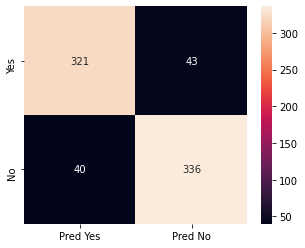

In [151]:
## Drawing up the confusion matrix for the Random Forest Model

lab = ['Yes', 'No']
plab = ['Pred Yes', 'Pred No']
cm = confusion_matrix(y_test.values,y_pred_rf,labels = lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab], columns = [i for i in plab])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm ,annot=True, fmt = 'g');

In [152]:
## Printing the classification report for the best Random Forest Model

print(classification_report(y_test.values,y_pred_rf))

              precision    recall  f1-score   support

          No       0.89      0.89      0.89       376
         Yes       0.89      0.88      0.89       364

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



In [153]:
y_pred_xgb = model_xgb.predict(X_test)

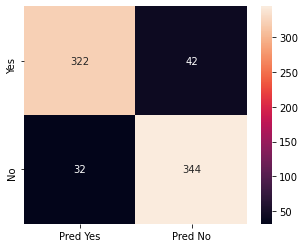

In [154]:
## Drawing up the confusion matrix for the XGBoost Model

lab = ['Yes', 'No']
plab = ['Pred Yes', 'Pred No']
cm = confusion_matrix(y_test.values,y_pred_xgb,labels = lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab], columns = [i for i in plab])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm ,annot=True, fmt = 'g');

In [155]:
## Printing the classification report for the best Random Forest Model

print(classification_report(y_test.values,y_pred_xgb))

              precision    recall  f1-score   support

          No       0.89      0.91      0.90       376
         Yes       0.91      0.88      0.90       364

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740

